<a href="https://colab.research.google.com/github/sarvesh23110076/ASY_1976318_ML3/blob/main/question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
from google.colab import files
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data_df = pd.read_csv(filename)

Saving xor.csv to xor.csv


In [ ]:
train_df = data_df.sample(n=200, random_state=42)
test_df = data_df.drop(train_df.index).sample(n=200, random_state=42)

X_train_full = train_df[['X1', 'X2']].values
y_train_full = train_df['label'].values
X_test = test_df[['X1', 'X2']].values
y_test = test_df['label'].values

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
def plot_decision_boundary(model, X, y, title="Decision Boundary", is_mlp=True):
    x_min, x_max = X[:, 0].min() , X[:, 0].max()
    y_min, y_max = X[:, 1].min() , X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    if is_mlp:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).flatten() > 0.5
    else:
        additional_features = np.c_[xx.ravel(), yy.ravel(),
                                     xx.ravel() * yy.ravel(),
                                     xx.ravel()**2,
                                     yy.ravel()**2]
        Z = model.predict(additional_features) > 0.5

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=20, cmap=plt.cm.Paired)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.show()

In [ ]:
penalties = [0.0001, 0.001, 0.01, 0.1, 1, 10]
best_l1_penalty, best_l2_penalty = None, None
best_l1_val_acc, best_l2_val_acc = 0, 0

for penalty in penalties:
    # L1 Regularized MLP
    model_mlp_l1 = Sequential([
        Dense(64, activation='relu', input_shape=(2,), kernel_regularizer=l1(float(penalty))),
        Dense(64, activation='relu', kernel_regularizer=l1(float(penalty))),
        Dense(1, activation='sigmoid')
    ])
    model_mlp_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model_mlp_l1.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_val, y_val))
    val_acc = model_mlp_l1.evaluate(X_val, y_val, verbose=0)[1]
    if val_acc > best_l1_val_acc:
        best_l1_val_acc, best_l1_penalty = val_acc, penalty

    # L2 Regularized MLP
    model_mlp_l2 = Sequential([
        Dense(64, activation='relu', input_shape=(2,), kernel_regularizer=l2(float(penalty))),
        Dense(64, activation='relu', kernel_regularizer=l2(float(penalty))),
        Dense(1, activation='sigmoid')
    ])
    model_mlp_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model_mlp_l2.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(X_val, y_val))
    val_acc = model_mlp_l2.evaluate(X_val, y_val, verbose=0)[1]
    if val_acc > best_l2_val_acc:
        best_l2_val_acc, best_l2_penalty = val_acc, penalty

print(f"Optimal L1 penalty: {best_l1_penalty} with validation accuracy: {best_l1_val_acc}")
print(f"Optimal L2 penalty: {best_l2_penalty} with validation accuracy: {best_l2_val_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Optimal L1 penalty: 0.001 with validation accuracy: 1.0
Optimal L2 penalty: 0.0001 with validation accuracy: 1.0


Basic MLP - Train Accuracy: 0.99, Test Accuracy: 0.96
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


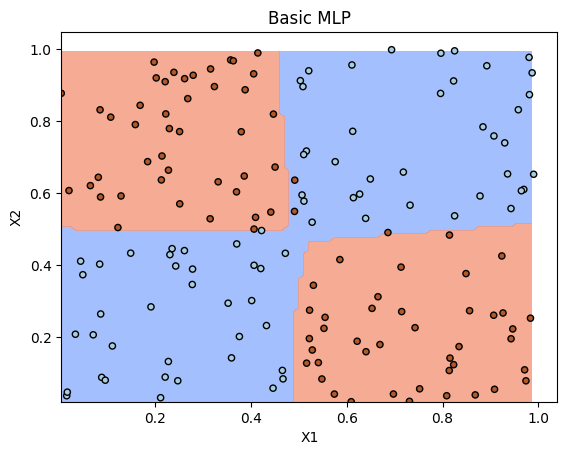

In [ ]:
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mlp.fit(X_train_full, y_train_full, epochs=300, batch_size=16, verbose=0)

train_accuracy_mlp = model_mlp.evaluate(X_train_full, y_train_full, verbose=0)[1]
test_accuracy_mlp = model_mlp.evaluate(X_test, y_test, verbose=0)[1]
print(f"Basic MLP - Train Accuracy: {train_accuracy_mlp:.2f}, Test Accuracy: {test_accuracy_mlp:.2f}")
plot_decision_boundary(model_mlp, X_train, y_train, title="Basic MLP", is_mlp=True)

L1 Regularized MLP - Train Accuracy: 0.99, Test Accuracy: 0.97
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


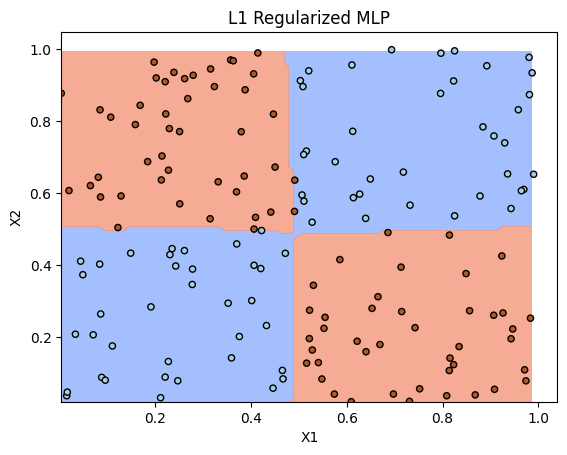

In [ ]:
model_mlp_l1 = Sequential([
    Dense(64, activation='relu', input_shape=(2,), kernel_regularizer=l1(best_l1_penalty)),
    Dense(64, activation='relu', kernel_regularizer=l1(best_l1_penalty)),
    Dense(1, activation='sigmoid')
])
model_mlp_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mlp_l1.fit(X_train_full, y_train_full, epochs=300, batch_size=16, verbose=0)

train_accuracy_l1 = model_mlp_l1.evaluate(X_train_full, y_train_full, verbose=0)[1]
test_accuracy_l1 = model_mlp_l1.evaluate(X_test, y_test, verbose=0)[1]
print(f"L1 Regularized MLP - Train Accuracy: {train_accuracy_l1:.2f}, Test Accuracy: {test_accuracy_l1:.2f}")
plot_decision_boundary(model_mlp_l1, X_train, y_train, title="L1 Regularized MLP", is_mlp=True)

L2 Regularized MLP - Train Accuracy: 0.99, Test Accuracy: 0.95
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


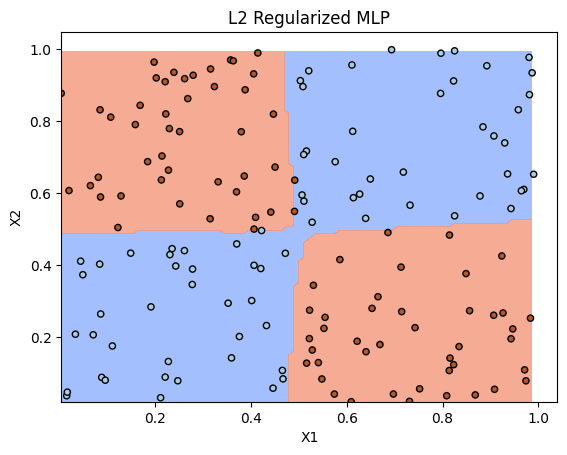

In [ ]:
model_mlp_l2 = Sequential([
    Dense(64, activation='relu', input_shape=(2,), kernel_regularizer=l2(best_l2_penalty)),
    Dense(64, activation='relu', kernel_regularizer=l2(best_l2_penalty)),
    Dense(1, activation='sigmoid')
])
model_mlp_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mlp_l2.fit(X_train_full, y_train_full, epochs=300, batch_size=16, verbose=0)

train_accuracy_l2 = model_mlp_l2.evaluate(X_train_full, y_train_full, verbose=0)[1]
test_accuracy_l2 = model_mlp_l2.evaluate(X_test, y_test, verbose=0)[1]
print(f"L2 Regularized MLP - Train Accuracy: {train_accuracy_l2:.2f}, Test Accuracy: {test_accuracy_l2:.2f}")
plot_decision_boundary(model_mlp_l2, X_train, y_train, title="L2 Regularized MLP", is_mlp=True)

In [ ]:
from sklearn.model_selection import cross_val_score

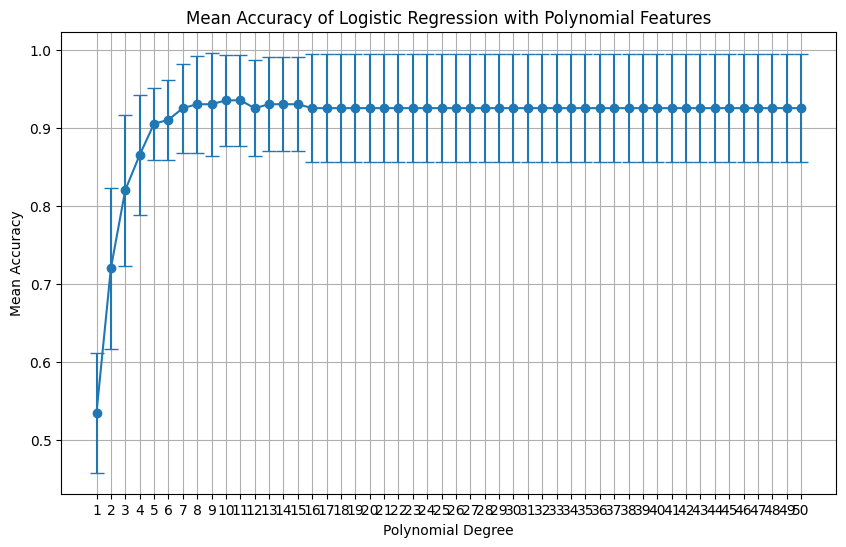

The best polynomial degree is: 10


In [ ]:
def evaluate_poly_log_reg(X, y, max_degree):
    degrees = range(1, max_degree + 1)
    mean_scores = []
    std_scores = []

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        log_reg_model = LogisticRegression(max_iter=1000)

        # Evaluate using cross-validation
        scores = cross_val_score(log_reg_model, X_poly, y, cv=5)  # 5-fold cross-validation
        mean_scores.append(scores.mean())
        std_scores.append(scores.std())

    return degrees, mean_scores, std_scores

max_degree = 50
degrees, mean_scores, std_scores = evaluate_poly_log_reg(X_train_full, y_train_full, max_degree)

plt.figure(figsize=(10, 6))
plt.errorbar(degrees, mean_scores, yerr=std_scores, fmt='o-', capsize=5)
plt.title('Mean Accuracy of Logistic Regression with Polynomial Features')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Accuracy')
plt.xticks(degrees)
plt.grid()
plt.show()

best_degree = degrees[np.argmax(mean_scores)]
print(f"The best polynomial degree is: {best_degree}")

Logistic Regression with Polynomial Features - Train Accuracy: 0.94, Test Accuracy: 0.96


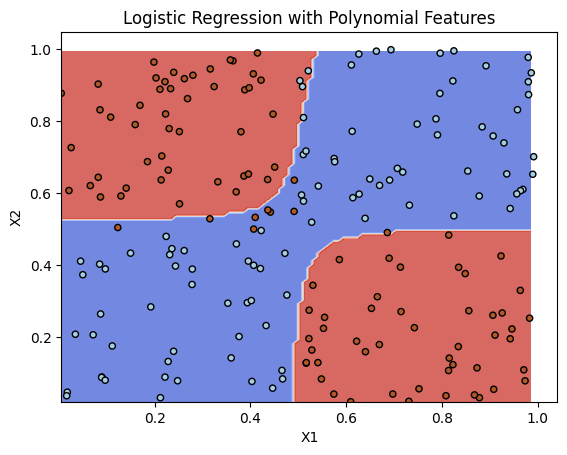

In [ ]:
# Create polynomial features for training and test sets
poly = PolynomialFeatures(best_degree)
X_train_log = poly.fit_transform(X_train_full)
X_test_log = poly.transform(X_test)

# Train logistic regression with additional features
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_log, y_train_full)

# Evaluate train and test accuracy
train_accuracy_log = accuracy_score(y_train_full, log_reg_model.predict(X_train_log))
test_accuracy_log = accuracy_score(y_test, log_reg_model.predict(X_test_log))
print(f"Logistic Regression with Polynomial Features - Train Accuracy: {train_accuracy_log:.2f}, Test Accuracy: {test_accuracy_log:.2f}")

# Plotting decision boundaries for Logistic Regression
def plot_decision_boundary_log_reg(model, poly, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() , X[:, 0].max()
    y_min, y_max = X[:, 1].min() , X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Create additional features for the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid_points)  # Transforming to polynomial features
    Z = model.predict(grid_poly)

    Z = (Z > 0.5).astype(float).reshape(xx.shape)  # Reshape Z to match xx and yy
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=20, cmap=plt.cm.Paired)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.show()

# Now plot the decision boundary for the Logistic Regression model
plot_decision_boundary_log_reg(log_reg_model, poly, X_train_full, y_train_full, title="Logistic Regression with Polynomial Features")